In [20]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()


### fourier tranform work
from numpy.fft import fft, fftfreq, fftshift

In [21]:
# Mount Gdrive to use this
sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *

# Load data

In [22]:
data_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-13_classify_datagen_no_dissipation"
raw_data = load_data(path=data_path,as_df=False)

Finished loading data into numpy array. Took 12.04s


In [95]:
offset = 150
shifted_data, center = get_window(raw_data,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

The Echo pulse occurs at timestep: 628


Range of shifted dataset: 478 778


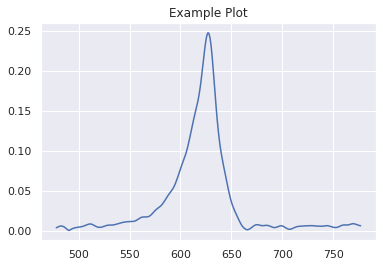

In [113]:
print("Range of shifted dataset:",center-offset,center+offset)
plt.plot(range(center-offset,center+offset),shifted_data[10,:])
plt.title("Example Plot")
plt.show()

In [151]:
?plt.specgram

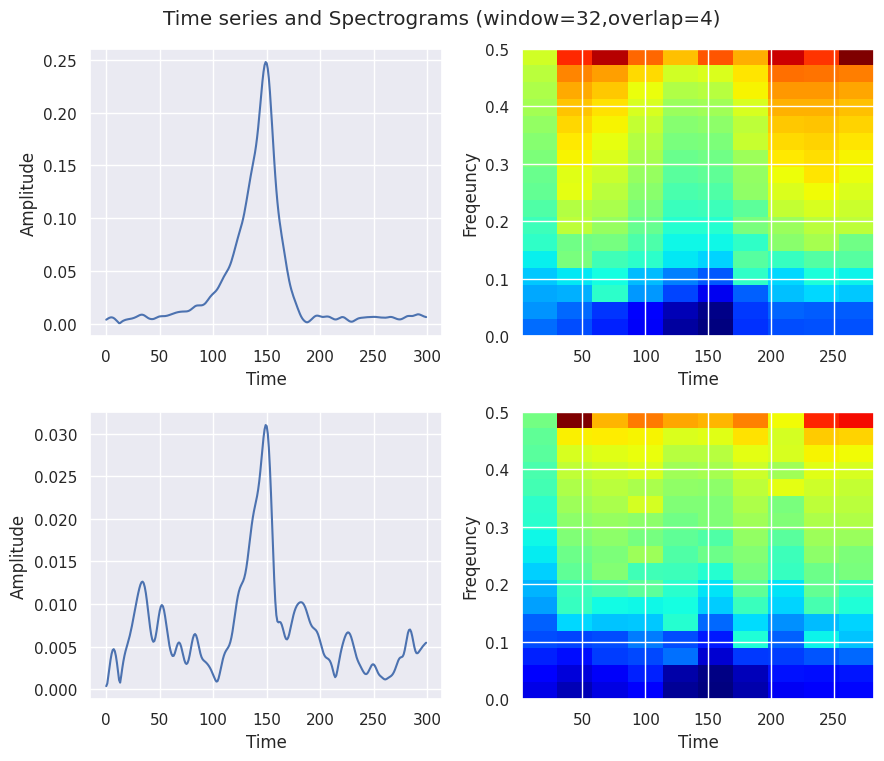

In [165]:
fig,axes = plt.subplots(2,2,figsize=(9,8),dpi=100)

axes[0,0].plot(shifted_data[10,:])
axes[1,0].plot(shifted_data[100,:])

# Spectrograms
axes[0,1].specgram(shifted_data[10,:],Fs=1,NFFT=32,cmap='jet_r',
             mode='psd',scale_by_freq=False,noverlap=4)

axes[1,1].specgram(shifted_data[100,:],Fs=1,NFFT=32,cmap='jet_r',
             mode='psd',scale_by_freq=False,noverlap=4)

for i in range(2):
    axes[i,1].set(xlabel='Time',ylabel='Freqeuncy')
    axes[i,0].set(xlabel='Time',ylabel='Amplitude')

plt.suptitle("Time series and Spectrograms (window=32,overlap=4)")
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

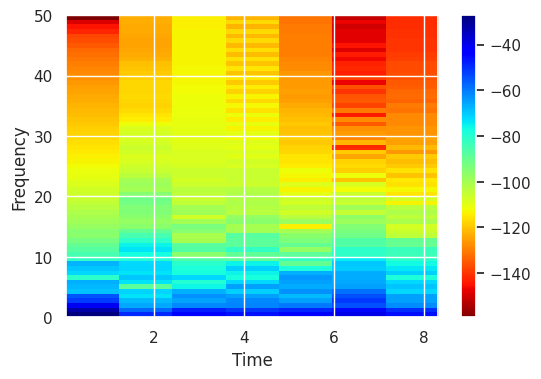

In [112]:
fig = plt.figure(dpi=100)
plt.specgram(raw_data[100,:],Fs=100,NFFT=128,cmap='jet_r',noverlap=10,
             mode='magnitude',scale_by_freq=True)
plt.colorbar()
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()

In [100]:
?plt.figure

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=256).
  


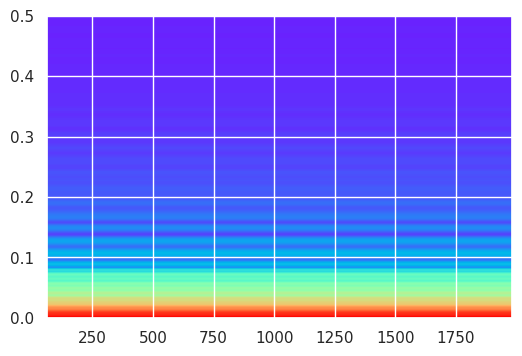

In [48]:
fig = plt.figure(dpi=100)
plt.specgram(shifted_data[200,:],Fs=1,NFFT=2048,cmap='rainbow')
plt.show()

In [50]:
a = np.sin(20*np.arange(200))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=200).
  """Entry point for launching an IPython kernel.


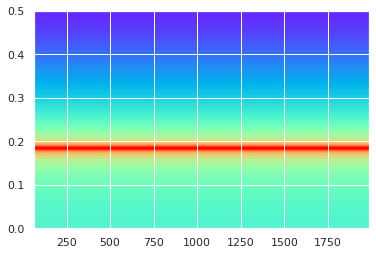

In [54]:
plt.specgram(a,Fs=1,NFFT=2048,cmap='rainbow')
plt.show()